We start off by importing the necessary libraries needed for this task. The new and useful library is the sklearn which will train the AI to make predictions. After that we load and check the head of the file

In [88]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.read_csv('TSLA.csv', sep=',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
1,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
2,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
3,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
4,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800


Next we do a litte data wrangling and check for any nulls in the file. As you can see this file doesn't have any issues

In [89]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Since there's no nulls, we the go on to check the deciding factors of a stock price when we eventually want to search them by date. That is 'Date' and 'Close'

<Axes: xlabel='Date', ylabel='Close'>

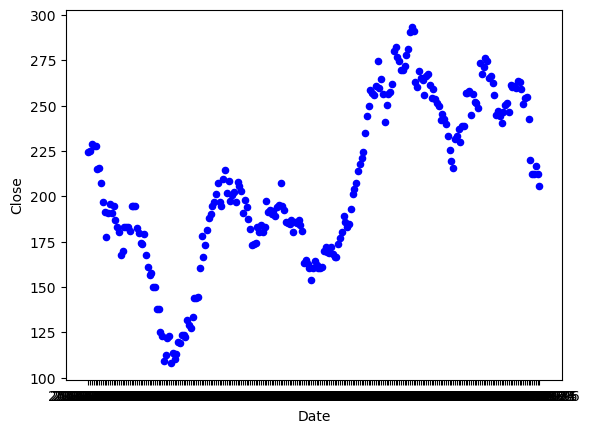

In [90]:
df.plot.scatter(x = 'Date', y = 'Close', color= 'blue')

Since the date column is string format, we use the 'Daytime' library to convert it to type float and then extract the year, month, and day parts of the 'Date' column to be used as input for the model as shown in the Dataframe below

In [91]:
df['Date'] = pd.to_datetime(df['Date'] , format= '%Y-%m-%d')
#df=pd.DataFrame(df)
#df['Date'] = df['Date'].apply(dt.date.toordinal)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500,2022,10,26
1,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,2022,10,27
2,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,2022,10,28
3,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,2022,10,31
4,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,2022,11,1


Now we start with the splitting and training of the model by first defining the columns to be trained, being 'Date'(now seperated into 'Year','Month', 'Day') and 'Close'. Afterwards split them between test and train sets, with train containing 67% and test containing 33% 

In [92]:
x = pd.DataFrame(df[['Year', 'Month', 'Day']])  
y = pd.DataFrame(df['Close'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

After the data has been defined and splitted, we then create a linear regression model and train it with the training data(67%). When that is done, we create predictions from the test data, calculate the MSE and Prediction percentage

In [93]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_train, y_train)  # perform linear regression
y_pred = linear_regressor.predict(x_test)  # make predictions
mse = metrics.mean_squared_error(y_test,y_pred)
r_squared = linear_regressor.score(x_test, y_test)

With all the legwork done all thats left is to plot the results and check the prediction percentage and the MSE

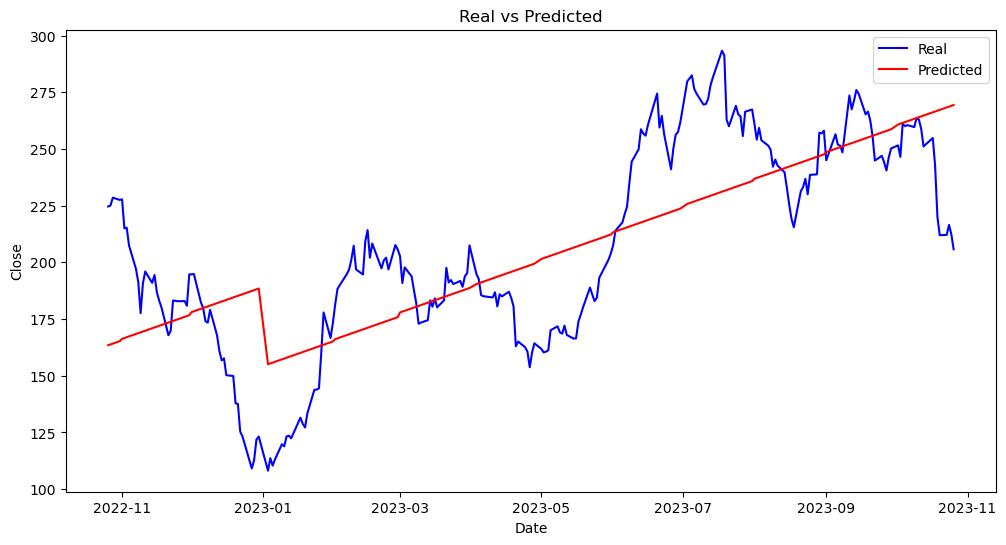

MSE = 736.0105119760292
R-squared (Prediction Percentage Score): 0.5596377235530481


In [94]:
plt.figure(figsize=(12, 6))

# Predicting for the entire dataset
close_pred = linear_regressor.predict(x)

# Plotting the actual values
plt.plot(df['Date'], y, label='Real', color='blue')

# Plotting the predicted values
plt.plot(df['Date'], close_pred, label='Predicted', color='red')

plt.title('Real vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred)))

# Calculate the R-squared (prediction percentage score)
#r_squared = linear_regressor.score(x_test, y_test)
print("R-squared (Prediction Percentage Score):", r_squared)

This cell is meant for the price searching via date. By storing the input date into a dataframe and running it through the linear regression prediction.

In [95]:
input_pred = {'Year': [2024], 'Month': [2], 'Day': [14]}
input_df = pd.DataFrame(input_pred)
prediction = linear_regressor.predict(input_df)
print(f"Predicted Close for: {input_pred} , {prediction[0]}")

Predicted Close for: {'Year': [2024], 'Month': [2], 'Day': [14]} , [276.74344771]
